# Exploring variables one by one

as mentioned in [main.ipynb](main.ipynb)

In [ ]:
import pandas as pd

df = pd.read_feather("train.feather")
print(df.shape)
df.head()

(607844, 23)


,query,url_page,title,source,alt,src,crossorigin,height,ismap,loading,...,srcset,width,class,style,tree_path,deg,text_tag,text,id,is_relevant
0,011103093,https://bank-routing.org/011103093-td-bank-na-...,Routing Number 011103093 - TD Bank NA in LEWIS...,bank-routing.org,Bank Routing,https://bank-routing.org/img/logo.png,None,None,None,None,...,None,None,None,None,"[a, div, nav, header, body, html]",2.0,div,Blog Contacts,3f5e067733178cc0f4b3a97cfc9c62e1,0
1,011103093,https://bank-routing.org/011103093-td-bank-na-...,Routing Number 011103093 - TD Bank NA in LEWIS...,bank-routing.org,011103093 routing number on TD Bank NA check,https://bank-routing.org/img/routing_numbers/r...,None,None,None,None,...,None,None,img-fluid,None,"[div, div, div, main, main, body, html]",1.0,div,Aside from the SWIFT code which each bank is d...,fe64168fa7afeefa73708113c4bc2730,1
2,011103093,https://bank-routing.org/011103093-td-bank-na-...,Routing Number 011103093 - TD Bank NA in LEWIS...,bank-routing.org,DMCA.com Protection Status,https://images.dmca.com/Badges/dmca_protected_...,None,None,None,None,...,None,None,None,None,"[a, p, div, div, div, footer, body, html]",NaN,None,None,5b5c3b6560ae158bf7ecd09f5ead1841,0
3,011103093,https://bank-routing.org/011103093-td-bank-na-...,Routing Number 011103093 - TD Bank NA in LEWIS...,bank-routing.org,Quantcast,https://pixel.quantserve.com/pixel/p-1meCEwxYU...,None,1,None,None,...,None,1,None,None,"[div, noscript, body, html]",3.0,body,Blog Contacts Bank Routing Numbers -> TD Bank ...,91fe71b49453d9037769b5a99c6f0856,0
4,011103093,https://www.gobankingrates.com/banking/banks/t...,TD Bank Routing Number in Connecticut: 2113705...,gobankingrates.com,Loading...,https://cdn.gobankingrates.com/wp-content/them...,None,None,None,None,...,None,None,None,None,"[span, form, div, div, div, main, body, html]",2.0,form,Sign-Up Now Please enter an email. Please ente...,021b4f809739c93f6ff913ce7389a9c9,0


We have 22 features + target variable.
The size of the dataset is huge, roughly 1/2M rows.

## Checking the target variable

In [ ]:
print((df.is_relevant == 0).sum() / df.shape[0])
df.is_relevant.value_counts()

0.9640746638940254


is_relevant
0    586007
1     21837
Name: count, dtype: int64

This is a hug class imabalance to be taken into account when performing training and measuring performance.

Let us check an example of possible values for all variables

In [ ]:
df.iloc[103000]

query                                                aroundthesims3
url_page          https://aroundthesims3.com/objects/thisnthat_0...
title             Around the Sims 3 | Custom Content Downloads| ...
source                                           aroundthesims3.com
alt                                               Around the Sims 3
src               https://aroundthesims3.com/objects/images/misc...
crossorigin                                                    None
height                                                          212
ismap                                                          None
loading                                                        None
longdesc                                                       None
referrerpolicy                                                 None
sizes                                                          None
srcset                                                         None
width                                           

## Crossorigin

just 4 possible values, a huge amount of NaN

In [ ]:
print(df.crossorigin.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].height.isna().sum()/ df.shape[0])
df.crossorigin.value_counts()

0.9994768394522279
0.021288356881041845


crossorigin
anonymous    299
              18
Anonymous      1
Name: count, dtype: int64

In [ ]:
df[(df.crossorigin == "anonymous")&(df.is_relevant == 1)].shape, df[(df.crossorigin == "")&(df.is_relevant == 1)].shape

((29, 23), (2, 23))

## height

Numerical variable, clear defined range of values, huge amount of NaN

0.5959769282908115
0.021288356881041845
count    237101.000000
mean        254.251787
std         462.557487
min        -175.000000
25%          54.000000
50%         160.000000
75%         333.000000
max       99999.000000
Name: height, dtype: float64


<Axes: ylabel='Density'>

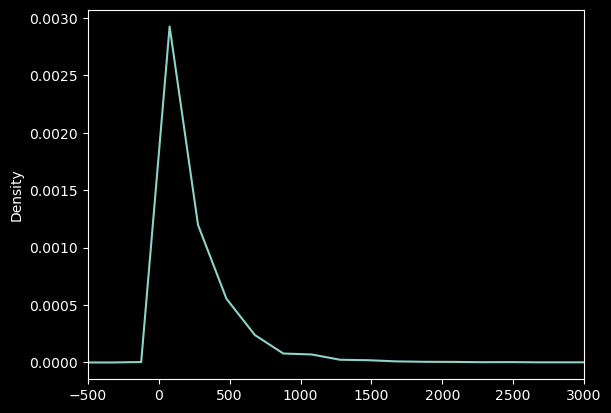

In [ ]:
print(df.height.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].height.isna().sum()/ df.shape[0])

# need to filter out anything that is not an integet
mask = pd.to_numeric(df.height, errors="coerce").notna()
print(df.height[mask].astype(float).describe())
df.height[mask].astype(float).plot.kde(xlim=[-500,3000])

<Axes: ylabel='Frequency'>

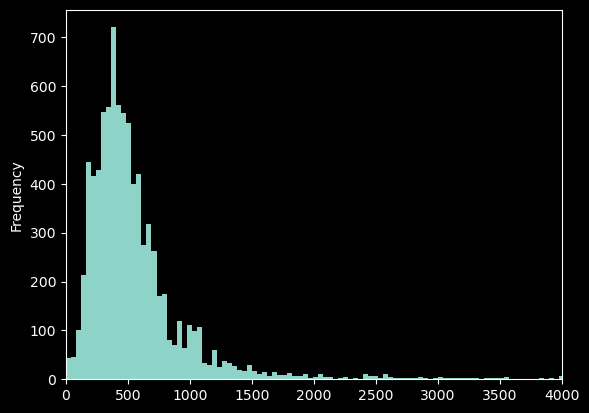

In [ ]:
tmp = df[(df.height.notna())&(df.is_relevant == 1)].height
pd.to_numeric(tmp, errors="coerce").plot.hist(bins=300, xlim=(0, 4000))

## ismap
rather uninteresting

In [ ]:
print(df.ismap.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].ismap.isna().sum()/ df.shape[0])
df.ismap.value_counts()

0.9999851935694026
0.035923690947019304


ismap
ismap    9
Name: count, dtype: int64

## loading

A couple interesting categorical values

In [ ]:
print(df.loading.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].loading.isna().sum()/ df.shape[0])
df.loading.value_counts()

0.8036749560742559
0.029231184317028713


loading
lazy      112518
eager       3937
auto        2767
normal        54
false         35
              18
eagle          4
lazyel         1
1              1
Name: count, dtype: int64

C:\Users\benja\AppData\Local\Temp\ipykernel_7640\1768863422.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df[df.loading.notna()][["loading", "is_relevant"]].groupby(


<Axes: xlabel='loading'>

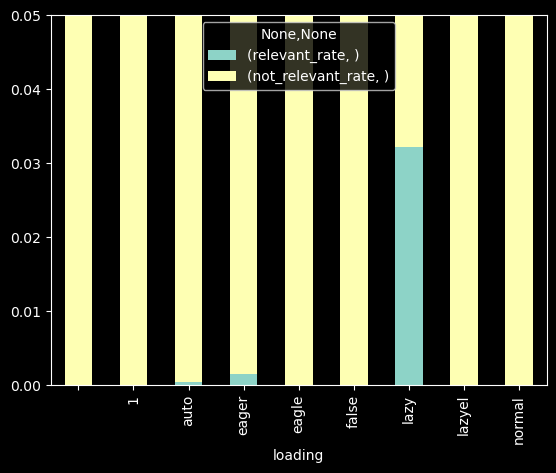

In [ ]:
# ploting percentage of interesting values (where the rate of is_relevant is high)
df[df.loading.notna()][["loading", "is_relevant"]].groupby(
    "loading", as_index=False
).agg({"sum"}).assign(
    relevant_rate=lambda d: d.is_relevant / df.loading.notna().sum()
).assign(
    not_relevant_rate=lambda d: 1 - d.relevant_rate
).drop(
    columns=["is_relevant"]
).plot.bar(
    x="loading", stacked=True, ylim=(0, .05) #hiding the top
)

## longdesc

Quite redundant with other url-like variables, not very exploitable as there is almost no text availabel

In [ ]:
print(df.longdesc.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].longdesc.isna().sum()/ df.shape[0])
df.longdesc[df.longdesc.notna()].head(30)

0.9975832614947256
0.03591052967537724


4405     //4.bp.blogspot.com/-kkH6XfYL_HQ/Td0p5HsQs_I/A...
16594                          https://www.webindia123.com
17106    //3.bp.blogspot.com/-Xw0KmR3GFGQ/TfeBuE6p7iI/A...
35717                                                     
35718                                                     
35721                                                     
35722                                                     
35723                                                     
35724                                                     
35725                                                     
35726                                                     
35727                                                     
35728                                                     
35729                                                     
35730                                                     
35731                                                     
35732                                                   

## referrerpolicy
Basically one intereting value for this categorical variable

0.9994669684984964
0.03591381999328775


C:\Users\benja\AppData\Local\Temp\ipykernel_7640\3041490814.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df[df.referrerpolicy.notna()][["referrerpolicy", "is_relevant"]].groupby(


<Axes: xlabel='referrerpolicy'>

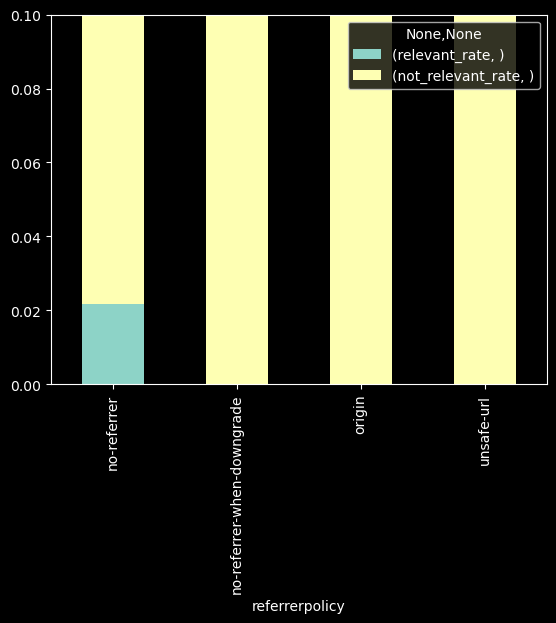

In [ ]:
print(df.referrerpolicy.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].referrerpolicy.isna().sum()/ df.shape[0])
df[df.referrerpolicy.notna()][["referrerpolicy", "is_relevant"]].groupby(
    "referrerpolicy", as_index=False
).agg({"sum"}).assign(
    relevant_rate=lambda d: d.is_relevant / df.referrerpolicy.notna().sum()
).assign(
    not_relevant_rate=lambda d: 1 - d.relevant_rate
).drop(
    columns=["is_relevant"]
).plot.bar(
    x="referrerpolicy", stacked=True, ylim=(0, .1)
)

## sizes

Not usable as is as the text pattern is intricate and units differ a lot. It would be possible to build a complex engine to convert everything in the same unit. For the sake of sipplicity and given other variables height and width we will just look whether this variable is specified or not

In [ ]:
print(df.sizes.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].sizes.isna().sum()/ df.shape[0])
df.sizes.value_counts().head(20)

0.8930860549746317
0.028606023914030575


sizes
(max-width: 300px) 100vw, 300px                                                                                                       5329
(max-width: 600px) 100vw, 600px                                                                                                       2641
(max-width: 1024px) 100vw, 1024px                                                                                                     1851
(max-width: 150px) 100vw, 150px                                                                                                       1781
(max-width: 100px) 100vw, 100px                                                                                                       1654
100vw                                                                                                                                 1637
(max-width: 500px) 100vw, 500px                                                                                                       1534
(max-width: 800px) 10

<Axes: xlabel='sizes'>

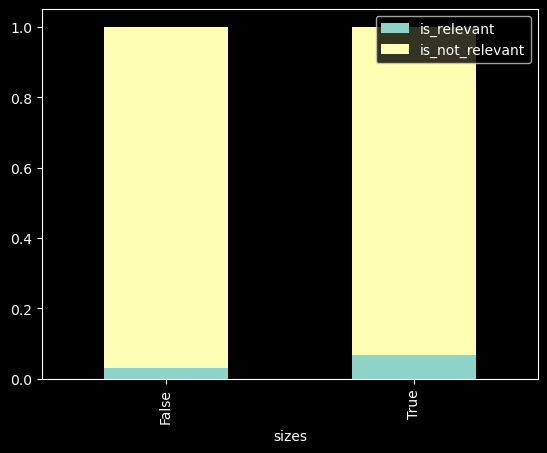

In [ ]:
tmp = (
    df[["sizes", "is_relevant"]]
    .assign(sizes=df.sizes.notna())
    .groupby("sizes", as_index=False)
    .agg({"is_relevant": [(lambda x: x.sum()), (lambda x: (1 - x).sum())]})
)
tmp.columns = tmp.columns.droplevel()
tmp.rename(columns={"": "sizes"}).assign(
    is_relevant=lambda d: d["<lambda_0>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
    is_not_relevant=lambda d: d["<lambda_1>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
).drop(columns=["<lambda_0>", "<lambda_1>"]).set_index("sizes").plot.bar(stacked=True)

In [ ]:
# Cheking the non-null rate for positive value (only 20%)
(df[df.is_relevant == 1][["sizes", "is_relevant"]].assign(sizes=df[df.is_relevant == 1].sizes.notna()).sizes.value_counts() / (df.is_relevant == 1).sum())

sizes
False    0.796263
True     0.203737
Name: count, dtype: float64

## srcset
not very informative

In [ ]:
tmp = df.groupby("srcset", as_index=False).agg({"is_relevant": "sum"})
tmp[tmp.is_relevant > 10]

,srcset,is_relevant
0,,17
9305,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",16
9306,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",168


In [ ]:
tmp.iloc[9306, :]["srcset"] # not super meaningful

'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7'

<Axes: xlabel='srcset'>

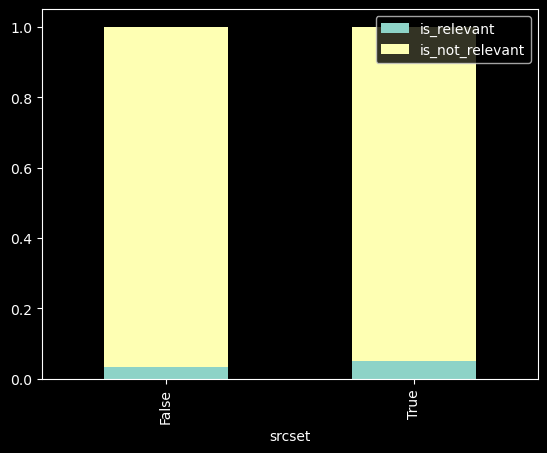

In [ ]:
tmp = (
    df[["srcset", "is_relevant"]]
    .assign(srcset=df.srcset.notna())
    .groupby("srcset", as_index=False)
    .agg({"is_relevant": [(lambda x: x.sum()), (lambda x: (1 - x).sum())]})
)
tmp.columns = tmp.columns.droplevel()
tmp.rename(columns={"": "srcset"}).assign(
    is_relevant=lambda d: d["<lambda_0>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
    is_not_relevant=lambda d: d["<lambda_1>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
).drop(columns=["<lambda_0>", "<lambda_1>"]).set_index("srcset").plot.bar(stacked=True)

In [ ]:
print(df.srcset.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].srcset.isna().sum()/ df.shape[0])
df.srcset.value_counts().head(20)

0.8259125696724817
0.027194477530418988


srcset
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7                                                                                                                                                                                                      4457
                                                                                                                                                                                                                                                                                    1665
/static/images/footer/poweredby_mediawiki_132x47.png 1.5x, /static/images/footer/poweredby_mediawiki_176x62.png 2x                                                                                                                                                                   505
/static/images/footer/wikimedia-button-1.5x.png 1.5x, /static/images/footer/wikimedia-button-2x.png 2x                                                

## width

similar to height

0.5782289534814854
0.02059739011983338
count    245938.000000
mean        334.538170
std         441.028909
min        -311.000000
25%          80.000000
50%         218.000000
75%         440.000000
max       11955.000000
Name: width, dtype: float64


<Axes: ylabel='Density'>

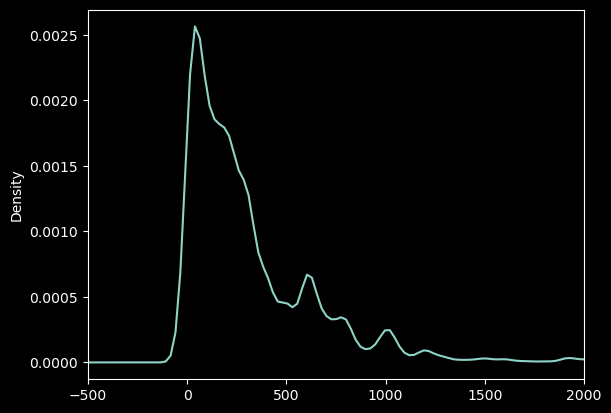

In [ ]:
print(df.width.isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1].width.isna().sum()/ df.shape[0])

# need to filter out anything that is not an integet
mask = pd.to_numeric(df.width, errors="coerce").notna()
print(df.width[mask].astype(float).describe())
df.width[mask].astype(float).plot.kde(xlim=[-500,2000])

<Axes: ylabel='Frequency'>

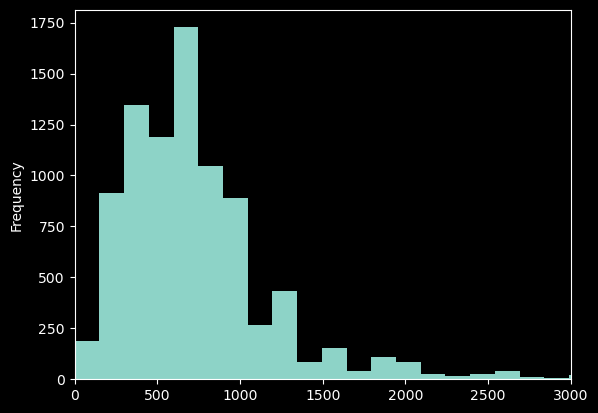

In [ ]:
tmp = df[(df.width.notna())&(df.is_relevant == 1)].width
pd.to_numeric(tmp, errors="coerce").plot.hist(bins=80, xlim=(0, 3000))

## Class

This can be broken down into individual css-classes and then the frequency and coincidence can be studied.
This implies quite some preprocessing of which I provide an example

In [ ]:
print(df["class"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["class"].isna().sum()/ df.shape[0])
df["class"].value_counts().head(20)

0.4900829818177032
0.015112430163002349


class
img-responsive                                                 7602
                                                               5603
item-img                                                       4218
attachment-woocommerce_thumbnail size-woocommerce_thumbnail    3592
MosaicAsset-module__thumb___epLhd                              3488
thumbimage                                                     3369
img-fluid                                                      3230
avatar                                                         3152
z_h_9d80b z_h_2f2f0                                            2966
entry-thumb                                                    2949
thumb                                                          2729
crp_thumb crp_featured                                         1950
lazyload                                                       1932
MosaicAsset-module__thumb___tdc6z                              1929
hCL kVc L4E MIw                           

<Axes: xlabel='class'>

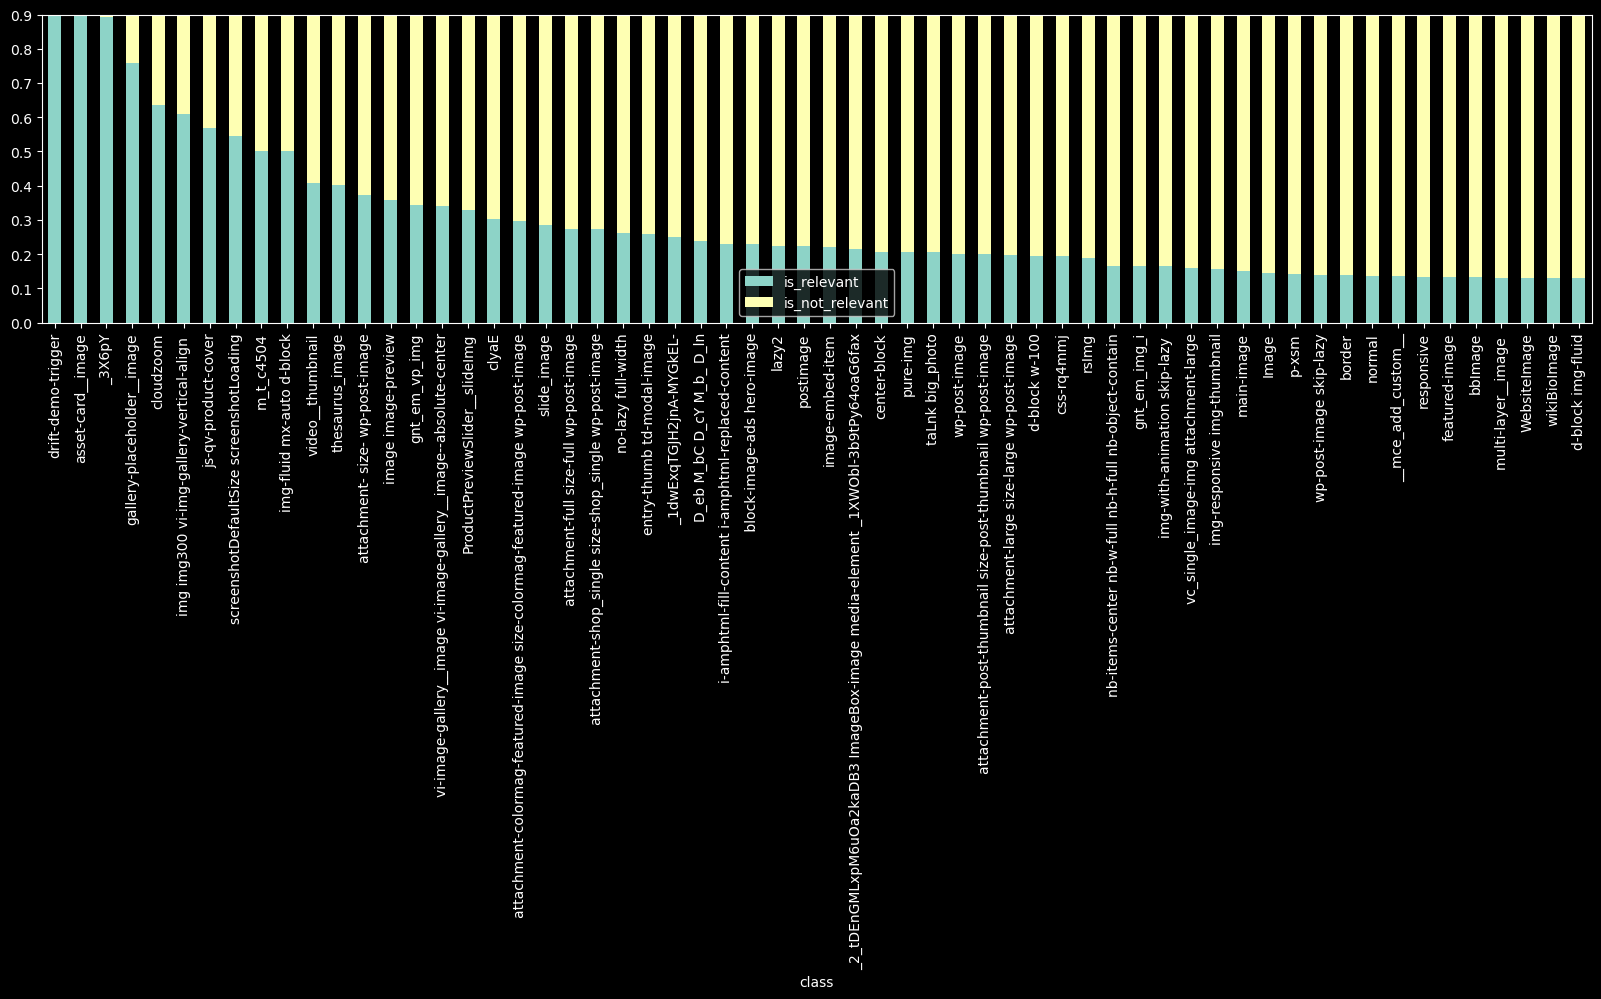

In [ ]:
top_classes = list(df["class"].value_counts().head(1000).index)
tmp = (
    df[(df["class"].isin(top_classes))]
    .groupby("class", as_index=False)
    .agg({"is_relevant": [(lambda x: x.sum()), (lambda x: (1 - x).sum())]})
)
tmp.columns = tmp.columns.droplevel()
tmp.rename(columns={"": "class"}).assign(
    is_relevant=lambda d: d["<lambda_0>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
    is_not_relevant=lambda d: d["<lambda_1>"] / (d["<lambda_0>"] + d["<lambda_1>"]),
).drop(columns=["<lambda_0>", "<lambda_1>"]).set_index("class").sort_values(
    by=["is_relevant"], ascending=[False]
).head(
    60
).plot.bar(
    stacked=True, figsize=(20, 4), ylim=[0, 0.9]
)  # truncated to .4 instead of 1. for visibility

In [ ]:
# df[df["class"].isin(["drift-demo-trigger", "asset-card_image", "_3X6pY"])].shape[0]

# This deserves quite some cleaning!
# Let us make a list of individual terms for each website.
# Let us count for how many domain each class appears, and for how many domains it is related to a relevant image at least once
tmp = df[["source", "is_relevant", "class"]].assign(class_processed = df["class"].str.split(" "))
terms = tmp["class_processed"]
terms

0                None
1         [img-fluid]
2                None
3                None
4                None
             ...     
607839           None
607840           None
607841           None
607842           None
607843           None
Name: class_processed, Length: 607844, dtype: object

In [ ]:
import numpy as np
from tqdm import tqdm
def count_terms(tmp:df, column_name:str):
    terms = {}
    terms_interdomain_relevance = {}
    # i=0
    for row in tqdm(tmp.itertuples(), total=tmp.shape[0]):
        classes = getattr(row, column_name)
        if classes not in (None, np.nan):
            classes = [cl.strip() for cl in classes if len(cl) > 2]
            for cl in classes:
                if cl in terms:
                    if row.source not in terms[cl] and row.is_relevant == 1:
                        if cl in terms_interdomain_relevance:
                            terms_interdomain_relevance[cl] += 1
                        else:
                            terms_interdomain_relevance[cl] = 1
                    terms[cl] += [row.source]
                else:
                    terms[cl] = [row.source]
                    if row.is_relevant == 1:
                        terms_interdomain_relevance[cl] = 1
    return terms, terms_interdomain_relevance
terms, terms_interdomain_relevance = count_terms(tmp, "class_processed")

100%|██████████| 607844/607844 [00:14<00:00, 42023.90it/s] 


In [ ]:
terms_interdomain_relevance = dict(sorted(terms_interdomain_relevance.items(), key=lambda x: x[1], reverse=True))
terms_interdomain_occurences = sorted({k:len(np.unique(v)) for k,v in terms.items()}.items(), key=lambda x: x[1], reverse=True)
terms_interdomain_occurences = {k:v for k,v in terms_interdomain_occurences if v > 9}
print(len(terms_interdomain_occurences))
terms_interdomain_occurences

733


{'wp-post-image': 3519,
 'size-full': 3392,
 'avatar': 2090,
 'aligncenter': 1822,
 'photo': 1786,
 'img-responsive': 1636,
 'alignnone': 1555,
 'size-medium': 1462,
 'attachment-full': 1367,
 'lazyload': 1103,
 'size-large': 1033,
 'image': 1005,
 'attachment-medium': 733,
 'img-fluid': 725,
 'logo': 716,
 'custom-logo': 705,
 'alignleft': 649,
 'size-thumbnail': 619,
 'attachment-large': 553,
 'attachment-thumbnail': 540,
 'lazy': 534,
 'attachment-woocommerce_thumbnail': 500,
 'size-woocommerce_thumbnail': 486,
 'alignright': 434,
 'attachment-post-thumbnail': 397,
 'size-post-thumbnail': 392,
 'jetpack-lazy-image': 314,
 'avatar-96': 265,
 'loading': 255,
 'entry-thumb': 247,
 'skip-lazy': 229,
 'avatar-80': 209,
 'td-retina-data': 205,
 'thumb': 204,
 'avatar-default': 202,
 'no-grav': 202,
 'header-image': 182,
 'thumbimage': 182,
 'statcounter': 177,
 'avatar-100': 173,
 'fusion-standard-logo': 167,
 'vc_single_image-img': 167,
 'avatar-60': 167,
 'header-logo': 164,
 'td-modal-

In [ ]:
terms_interdomain_relevance

{'wp-post-image': 796,
 'size-full': 725,
 'aligncenter': 337,
 'attachment-full': 289,
 'img-responsive': 262,
 'size-large': 208,
 'alignnone': 198,
 'attachment-post-thumbnail': 181,
 'size-post-thumbnail': 180,
 'attachment-large': 142,
 'size-medium': 115,
 'img-fluid': 110,
 'alignleft': 98,
 'alignright': 95,
 'gallery-placeholder__image': 60,
 'd-block': 42,
 'td-modal-image': 40,
 'image': 39,
 'jetpack-lazy-image': 37,
 'lazyload': 35,
 'js-qv-product-cover': 34,
 'vc_single_image-img': 34,
 'attachment-medium': 33,
 'attachment-': 30,
 'size-': 30,
 'entry-thumb': 28,
 'w-100': 28,
 'attachment-shop_single': 27,
 'skip-lazy': 27,
 'size-shop_single': 26,
 'mx-auto': 24,
 'photo': 22,
 'img': 22,
 'logo': 21,
 'thumbimage': 21,
 'featured-image': 20,
 'center-block': 19,
 'default': 17,
 'w-full': 16,
 'custom-logo': 15,
 'img-thumbnail': 15,
 'fl-photo-img': 15,
 'card-img-top': 15,
 'cloudzoom': 15,
 'thumb': 15,
 'avia_image': 14,
 'img-rounded': 14,
 'thumbnail': 14,
 'ro

In [ ]:
d = {"class_item": [], "interdomain_occurence": [], "interdomain_relevance": []}
for key in terms_interdomain_occurences:
    d["class_item"].append(key)
    d["interdomain_occurence"].append(terms_interdomain_occurences[key])
    if key not in terms_interdomain_relevance:
        d["interdomain_relevance"].append(0)
    else:
        d["interdomain_relevance"].append(terms_interdomain_relevance[key])
d = (
    pd.DataFrame(d)
    .assign(relevance_rate=lambda d: d.interdomain_relevance / d.interdomain_occurence)
    .sort_values(by=["interdomain_occurence","relevance_rate"], ascending=[False, False])
)
print(d.shape[0])
d.head(30)

733


,class_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,wp-post-image,3519,796,0.226201
1,size-full,3392,725,0.213738
2,avatar,2090,5,0.002392
3,aligncenter,1822,337,0.184962
4,photo,1786,22,0.012318
5,img-responsive,1636,262,0.160147
6,alignnone,1555,198,0.127331
7,size-medium,1462,115,0.078659
8,attachment-full,1367,289,0.211412
9,lazyload,1103,35,0.031732


In [ ]:
# suggested keywords to keep:
# elements that appear in > 100 domains and have a relevance > .15 or items that appear in < 100 domains and more than 20 but have a relevance > .3
# we can consequently 
d[((d["interdomain_occurence"] >= 100) & (d["relevance_rate"] >= .15)) | ((d["interdomain_occurence"] < 100) & (d["relevance_rate"] >= .3))][d["interdomain_occurence"]>20].reset_index(drop=True)

C:\Users\benja\AppData\Local\Temp\ipykernel_7640\743861730.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d[((d["interdomain_occurence"] >= 100) & (d["relevance_rate"] >= .15)) | ((d["interdomain_occurence"] < 100) & (d["relevance_rate"] >= .3))][d["interdomain_occurence"]>20].reset_index(drop=True)


,class_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,wp-post-image,3519,796,0.226201
1,size-full,3392,725,0.213738
2,aligncenter,1822,337,0.184962
3,img-responsive,1636,262,0.160147
4,attachment-full,1367,289,0.211412
5,size-large,1033,208,0.201355
6,img-fluid,725,110,0.151724
7,alignleft,649,98,0.151002
8,attachment-large,553,142,0.256781
9,alignright,434,95,0.218894


## style
quite similar to class

In [ ]:
print(df["style"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["style"].isna().sum()/ df.shape[0])
df["style"].value_counts().sort_values(ascending=False).head(20)

0.871837181908516
0.03155579392080863


style
display:none;                                                      8266
width:92px;height:92px;object-fit:cover;object-position:25% 25%    6476
display:none                                                       4839
                                                                   3094
max-width: 100%; height: auto;                                     1839
max-width:64px;max-height:64px                                     1449
max-height:50px;max-width:50px;                                    1057
height: 100%;                                                       865
max-width:160px;max-height:160px                                    844
display: none;                                                      775
display:none;visibility:hidden;                                     768
border-style:none;                                                  654
width:100%                                                          622
padding: 5px;                                             

In [ ]:
df[df.is_relevant == 1]["style"].value_counts().sort_values(ascending=False).head(30)

style
                                                            349
width:100%;                                                  83
max-height:700px                                             83
width:31px;height:47px                                       76
max-width:400px;min-height:;background-color:;               55
max-height: 65vh; max-width: 100%;                           47
width:100%                                                   41
width:auto;max-width:100%                                    36
object-fit:contain;min-width:300px                           32
max-width:556px;max-height:370px                             32
height:auto;                                                 31
max-width: 100%;                                             31
display: block; margin-left: auto; margin-right: auto;       31
cursor: pointer;                                             29
width: 100%;                                                 27
max-width:100%;                   

In [ ]:
# testing regexp out
# https://regex101.com/
tmp = pd.Series(
    [
        "display: block; margin-left: auto; margin-right: auto;",
        "width:31px;height:47px  ",
        "width:100%; height:auto;",
        "max-width:80%;max-height:800px; ",
    ]
)


def extract_classes(s: pd.Series):
    return (
        s.str.lower()
        .str.extractall(r"(?P<css_class>[^;,:\"\n\s]+)[ ]*:")
        .droplevel(1)
        .reset_index()
        .rename(columns={"index": "original_index"})
    )


extract_classes(tmp)

,original_index,css_class
0,0,display
1,0,margin-left
2,0,margin-right
3,1,width
4,1,height
5,2,width
6,2,height
7,3,max-width
8,3,max-height


In [ ]:
extract_classes(df["style"])

,original_index,css_class
0,18,border
1,19,float
2,19,margin-top
3,19,cursor
4,20,cursor
...,...,...
160780,607738,height
160781,607754,display
160782,607787,height
160783,607825,display


In [ ]:
# checking distribution of the number of classes for relevant images
# checking the distribution of relevant images for each css-class
tmp = (
    df[["source", "is_relevant"]]
    .reset_index()
    .merge(
        extract_classes(df["style"]),
        how="left",
        left_on="index",
        right_on="original_index",
    )
    .drop(columns=["original_index"])
)
tmp = pd.DataFrame(tmp.groupby("index")["css_class"].apply(list)).assign(
    source=df.source,
    is_relevant=df.is_relevant,
    css_class=lambda d: d.css_class.apply(
        lambda s: s if s[0] is not np.nan else np.nan
    ),
)
tmp.head(30)

,css_class,source,is_relevant
index,,,
0,NaN,bank-routing.org,0
1,NaN,bank-routing.org,1
2,NaN,bank-routing.org,0
3,NaN,bank-routing.org,0
4,NaN,gobankingrates.com,0
5,NaN,gobankingrates.com,0
6,NaN,gobankingrates.com,0
7,NaN,gobankingrates.com,0
8,NaN,gobankingrates.com,0


In [ ]:
terms, terms_interdomain_relevance = count_terms(tmp, "css_class")

100%|██████████| 607844/607844 [00:09<00:00, 65732.62it/s] 


In [ ]:
terms_interdomain_relevance = dict(sorted(terms_interdomain_relevance.items(), key=lambda x: x[1], reverse=True))
terms_interdomain_occurences = sorted({k:len(np.unique(v)) for k,v in terms.items()}.items(), key=lambda x: x[1], reverse=True)
terms_interdomain_occurences = {k:v for k,v in terms_interdomain_occurences if v > 9}
print(len(terms_interdomain_occurences))
terms_interdomain_occurences

66


{'display': 4088,
 'width': 3131,
 'height': 3062,
 'max-width': 1936,
 'border': 1181,
 'position': 1005,
 'float': 856,
 'margin': 831,
 'max-height': 603,
 'left': 587,
 'margin-right': 574,
 'border-style': 561,
 'margin-left': 529,
 'margin-top': 473,
 'padding': 434,
 'top': 405,
 'vertical-align': 395,
 'margin-bottom': 388,
 'visibility': 343,
 'border-width': 340,
 'bottom': 297,
 'object-fit': 253,
 'overflow': 230,
 'cursor': 224,
 'border-radius': 215,
 'opacity': 203,
 'z-index': 175,
 'object-position': 169,
 'padding-top': 153,
 'border-color': 129,
 'padding-right': 128,
 'box-shadow': 110,
 'right': 94,
 'padding-left': 93,
 'padding-bottom': 93,
 'text-align': 86,
 'min-height': 79,
 'background-color': 70,
 'background': 69,
 'min-width': 68,
 'font-size': 55,
 '-webkit-box-shadow': 47,
 'background-image': 45,
 'color': 44,
 'box-sizing': 42,
 'filter': 41,
 '-moz-box-shadow': 36,
 'transform': 27,
 'aspect-ratio': 22,
 'font-family': 21,
 '--blurry': 17,
 "url('dat

In [ ]:
d = {"css_item": [], "interdomain_occurence": [], "interdomain_relevance": []}
for key in terms_interdomain_occurences:
    d["css_item"].append(key)
    d["interdomain_occurence"].append(terms_interdomain_occurences[key])
    if key not in terms_interdomain_relevance:
        d["interdomain_relevance"].append(0)
    else:
        d["interdomain_relevance"].append(terms_interdomain_relevance[key])
d = (
    pd.DataFrame(d)
    .assign(relevance_rate=lambda d: d.interdomain_relevance / d.interdomain_occurence)
    .sort_values(by=["interdomain_occurence","relevance_rate"], ascending=[False, False])
)
print(d.shape[0])
d.head(30)

66


,css_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,display,4088,85,0.020793
1,width,3131,312,0.099649
2,height,3062,179,0.058459
3,max-width,1936,146,0.075413
4,border,1181,55,0.046571
5,position,1005,15,0.014925
6,float,856,109,0.127336
7,margin,831,87,0.104693
8,max-height,603,44,0.072968
9,left,587,13,0.022147


In [ ]:
# deducing class labels
# there are only 66 css-items... Hence we could keep most of these without entering the curse of dimensionality
# suggested course of action : pick all css-items that are relevant occasionally on at least 10 domains
# this leaves us with 35 labels with a minimum "relevance_rate of 35%"
d[d.interdomain_relevance >= 10].reset_index(drop=True)

,css_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,display,4088,85,0.020793
1,width,3131,312,0.099649
2,height,3062,179,0.058459
3,max-width,1936,146,0.075413
4,border,1181,55,0.046571
5,position,1005,15,0.014925
6,float,856,109,0.127336
7,margin,831,87,0.104693
8,max-height,603,44,0.072968
9,left,587,13,0.022147


## tree_path
Also informative and somewhat similar to the previous variables.
Because the preprocessing takes time, we are saving the output stats into a pickle object

In [ ]:
# it would be interesting here to measure the correlation between the relevance and the length of the tree
from scipy.stats import pointbiserialr
tmp = df[["is_relevant", "source", "tree_path"]].assign(tree_length=df.tree_path.map(len))
pointbiserialr(tmp.is_relevant, tmp.tree_length) # a small p-value indicates statisticall significance... yet the correlation seems extremely small

SignificanceResult(statistic=-0.03538824210754142, pvalue=1.1502143454885356e-167)

In [ ]:
tmp

,is_relevant,source,tree_path,tree_length
0,0,bank-routing.org,"[a, div, nav, header, body, html]",6
1,1,bank-routing.org,"[div, div, div, main, main, body, html]",7
2,0,bank-routing.org,"[a, p, div, div, div, footer, body, html]",8
3,0,bank-routing.org,"[div, noscript, body, html]",4
4,0,gobankingrates.com,"[span, form, div, div, div, main, body, html]",8
...,...,...,...,...
607839,0,zimbio.com,"[a, div, div, div, div, div, div, div, div, di...",13
607840,0,zimbio.com,"[noscript, body, html]",3
607841,0,zimbio.com,"[a, div, div, div, div, body, html]",7
607842,0,zimbio.com,"[a, div, div, div, div, div, div, div, div, di...",13


In [ ]:
# # we can check as usual the significance of some keywords:
# tmp = tmp.drop(columns=["tree_length"]).assign(tree_path=lambda d: d.tree_path.apply(np.unique).apply(list))
                        
# terms, terms_interdomain_relevance = count_terms(tmp, "tree_path") #takes longer since this time the field is never null
# terms_interdomain_relevance = dict(sorted(terms_interdomain_relevance.items(), key=lambda x: x[1], reverse=True))
# terms_interdomain_occurences = sorted({k:len(np.unique(v)) for k,v in terms.items()}.items(), key=lambda x: x[1], reverse=True)
# terms_interdomain_occurences = {k:v for k,v in terms_interdomain_occurences if v > 9}
# d = {"css_item": [], "interdomain_occurence": [], "interdomain_relevance": []}
# for key in terms_interdomain_occurences:
#     d["css_item"].append(key)
#     d["interdomain_occurence"].append(terms_interdomain_occurences[key])
#     if key not in terms_interdomain_relevance:
#         d["interdomain_relevance"].append(0)
#     else:
#         d["interdomain_relevance"].append(terms_interdomain_relevance[key])
# d = (
#     pd.DataFrame(d)
#     .assign(relevance_rate=lambda d: d.interdomain_relevance / d.interdomain_occurence)
#     .sort_values(by=["interdomain_occurence","relevance_rate"], ascending=[False, False])
# )
# d.to_pickle("pickled.pickle")
# print(d.shape[0])
d = pd.read_pickle("pickled.pickle")
d.head(30)

,css_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,html,21806,2334,0.107035
1,body,21745,2371,0.109037
2,div,21577,2377,0.110164
3,header,11322,311,0.027469
4,article,8506,1804,0.212086
5,section,8181,1035,0.126513
6,main,7889,1514,0.191913
7,noscript,7840,264,0.033673
8,footer,6484,16,0.002468
9,figure,5236,1096,0.209320


In [ ]:
# del terms, terms_interdomain_occurences, terms_interdomain_relevance
# We will ignore hmtl, body, div, header as they basically occur on every website. Basically when interdomain_occurence > 10000 this is not relevant
# We will also cut out items that have less than 10 websites relevant
d[(d.interdomain_occurence < 10000)&(d.interdomain_relevance > 10)].reset_index(drop=True) # This leaves us with 18 possible labels

,css_item,interdomain_occurence,interdomain_relevance,relevance_rate
0,article,8506,1804,0.212086
1,section,8181,1035,0.126513
2,main,7889,1514,0.191913
3,noscript,7840,264,0.033673
4,footer,6484,16,0.002468
5,figure,5236,1096,0.209320
6,span,5150,321,0.062330
7,nav,3895,42,0.010783
8,aside,3675,44,0.011973
9,form,2518,122,0.048451


## deg
Limited information available, requires no preprocessing

In [ ]:
print(df["deg"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["deg"].isna().sum()/ df.shape[0])
df["deg"].value_counts().sort_values(ascending=False).head(20)

0.3027799896025954
0.010481307703950355


deg
2.0    178043
3.0    138816
1.0    106942
Name: count, dtype: int64

## text_tag

In [ ]:
print(df["text_tag"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["text_tag"].isna().sum()/ df.shape[0])
df.text_tag
df["text_tag"].value_counts().sort_values(ascending=False).head(20)

0.3027799896025954
0.010481307703950355


text_tag
div        218215
a           83441
li          34401
figure      17356
p            9141
body         8059
article      7975
span         7279
tr           5645
td           4683
head         3559
section      3496
ul           3181
header       2760
button       1810
table        1801
aside        1103
form          970
nav           967
footer        949
Name: count, dtype: int64

## text

Text feature, one of the most explanatory variables of the dataset

In [ ]:
print(df["text"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["text"].isna().sum()/ df.shape[0])
df.text

0.3027799896025954
0.010481307703950355


0                                             Blog Contacts
1         Aside from the SWIFT code which each bank is d...
2                                                      None
3         Blog Contacts Bank Routing Numbers -> TD Bank ...
4         Sign-Up Now Please enter an email. Please ente...
                                ...                        
607839    'Love, Gilda' Opening Night Gala - 2018 Tribec...
607840    TV WHAT TO WATCH NETFLIX & HULU MOVIES MOVIE N...
607841                                     more from Zimbio
607842    'Love, Gilda' Opening Night Gala - 2018 Tribec...
607843                                 Source: Getty Images
Name: text, Length: 607844, dtype: object

## id

Just corresponds to a unique DB id, let us drop it

In [ ]:
print(df["id"].isna().sum()/ df.shape[0]), print(df[df["is_relevant"] == 1]["id"].isna().sum()/ df.shape[0])
df.id

0.0
0.0


0         3f5e067733178cc0f4b3a97cfc9c62e1
1         fe64168fa7afeefa73708113c4bc2730
2         5b5c3b6560ae158bf7ecd09f5ead1841
3         91fe71b49453d9037769b5a99c6f0856
4         021b4f809739c93f6ff913ce7389a9c9
                        ...               
607839    be4600496574da8220ac4aa5a0e18b9c
607840    5ec3a478dfd3b8964397a5c92d08c2a6
607841    dfb4c61ec0bb680193826a201bce9ceb
607842    25271b2c3b2aba44d97080ad78cf62cc
607843    834ec873e78a310d60e8adcde563118f
Name: id, Length: 607844, dtype: object

now let us return to [main.ipynb](main.ipynb)